In [20]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [21]:
path = 'C:\\Users\shakil\\Desktop\\academic lab\\images\\Lenna_(test_image).png'
image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, (250, 250))

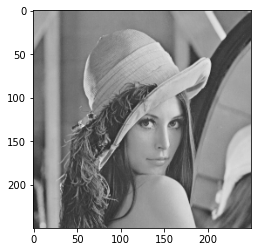

In [22]:
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [23]:
height, weight = image.shape

In [24]:
kernal = np.array(([0,-1,0], [-1,5,-1], [0,-1,0]), np.float32)

In [25]:
padding = kernal.shape[0] // 2

In [26]:
new_image = cv2.copyMakeBorder(image, padding, padding, padding, padding, cv2.BORDER_REPLICATE)

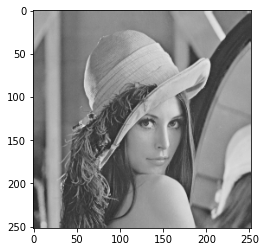

In [27]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [28]:
result = np.zeros((height, weight), np.float32)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


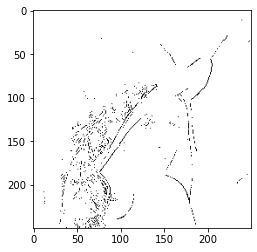

In [29]:
for row in range(height):
  for col in range(weight):
    sum = 0
    for i in range(kernal.shape[0]):
      for j in range(kernal.shape[1]):
        # sum += new_image[x - i][y - j] * kernal[i][j]
        # sum += kernal[j][i]*new_image[x - j - padding][y - i - padding]
        sum += kernal[i][j] * new_image[row + i][col + j]
    result[row][col] = sum
    # result[x, y] = np.sum(new_image[x:x+kernal.shape[0], y:y+kernal.shape[1]] * kernal)


plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))

convolution with circulant matrix

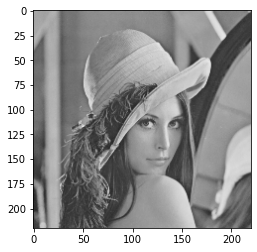

In [30]:
path = 'C:\\Users\shakil\\Desktop\\academic lab\\images\\Lenna_(test_image).png'
image = cv2.imread(path, cv2.IMREAD_GRAYSCALE)
image = cv2.resize(image, (220, 220))
height, weight = image.shape
kernal = np.array(([0,-1,0], [-1,5,-1], [0,-1,0]), np.float32)
# kernal = np.array(([1,2,3], [4,5,6], [7,8,9]), np.float32)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [31]:
matrixKernal = np.zeros((height**2, weight**2), np.float32)

MemoryError: Unable to allocate 8.73 GiB for an array with shape (48400, 48400) and data type float32

In [ ]:
# creating the first row
# kernal will be square size of image
for i in range(kernal.shape[0]):
  for j in range(kernal.shape[1]):
    matrixKernal[0][i*height + j] = kernal[i][j]


In [ ]:
# from scipy.ndimage.interpolation import shift
for i in range(1, height**2):
  matrixKernal[i] = np.roll(matrixKernal[i-1], 1)

  # matrixKernal[i] = shift(matrixKernal[i-1], 1, cval=0)
  # matrixKernal[i][0] = matrixKernal[i-1][weight**2-1]
  # for j in range(1, weight**2):
  #   matrixKernal[i][j] = matrixKernal[i-1][j-1]

In [ ]:
# input image
# matImage = np.zeros((height*weight, 1), np.float32)
# for i in range(image.shape[0]*image.shape[1]):
#     matImage[i][0] = image[i//height][i%height]


matImage = image.flatten()
matImage = matImage.reshape(height*weight, 1)
# flattern() will create an 1D array from the input image
# reshape() will create a (height*weight,1) matrix from the 1D array

In [ ]:
result = np.dot(matrixKernal, matImage)

In [ ]:
result = np.resize(result, (height, weight))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


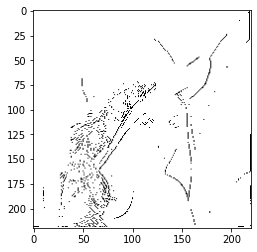

In [ ]:
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))